# Fitting Models Exercise 2

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [3]:
f = np.load('decay_osc.npz')
tdata = np.array(f['tdata'])
ydata = np.array(f['ydata'])
dy = np.array(f['dy'])

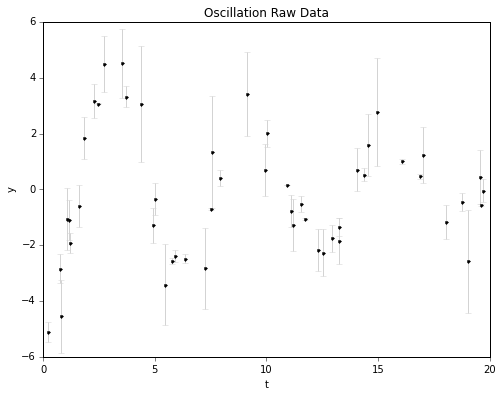

In [20]:
plt.figure(figsize=(8,6))
plt.errorbar(tdata, ydata, dy, fmt='.k', ecolor='lightgray')
plt.tick_params(axis='x', direction='out', top='off')
plt.tick_params(axis='y', direction='out', right='off')
plt.xlabel('t'), plt.ylabel('y'), plt.title('Oscillation Raw Data');

In [15]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

In [16]:
def model(t, A, lam, omega, delta):
    return A*np.exp(-lam*t)*np.cos(omega*t) + delta

In [17]:
theta_best, theta_cov = opt.curve_fit(model, tdata, ydata, sigma=dy, absolute_sigma=True)

In [18]:
print('A = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('λ = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('ω = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[2,2])))
print('δ = {0:.3f} +/- {1:.3f}'.format(theta_best[3], np.sqrt(theta_cov[3,3])))

A = -4.896 +/- 0.063
λ = 0.094 +/- 0.003
ω = -1.001 +/- 0.001
δ = 0.027 +/- 0.014


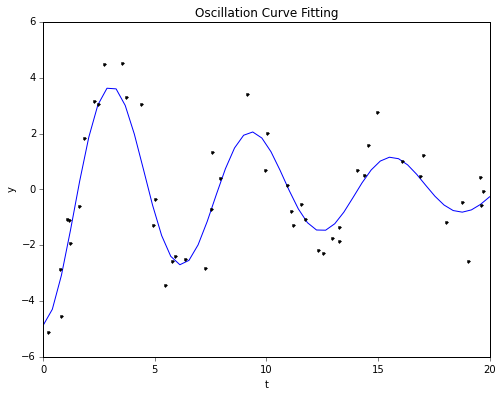

In [21]:
tfit = np.linspace(0,20)
yfit = model(tfit, theta_best[0], theta_best[1], theta_best[2], theta_best[3])
plt.figure(figsize=(8,6))
plt.plot(tfit, yfit)
plt.plot(tdata, ydata, 'k.')
plt.tick_params(axis='x', direction='out', top='off')
plt.tick_params(axis='y', direction='out', right='off')
plt.xlabel('t'), plt.ylabel('y'), plt.title('Oscillation Curve Fitting');

In [10]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors